### Feature Scaling

In [24]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

### Dataset
ชุดข้อมูล (Dataset) เกี่ยวกับมะเร็ง (Breast cancer) ได้จากข้อมูลภาพดิจิทัลของชิ้นเนื้อ เก็บโดยการใช้เข็มเจาะเพื่อดูดชิ้นเนื้อหรือเซลล์ (FNA : Fine Neddle Aspiration) นำไปตรวจแล้วบันทึกข้อมูล แต่ละเคส (แต่ละ Sample) มีรายละเอียดดังนี้

    - ชุดข้อมูลจำนวน 569 รายการ (569 Samples)
    - Feature (Attribuites) : จำนวน 30 คอลัมน์ (30 ตัวแปร) ประกอบด้วยค่าขนาดต่างๆ ของ Samples เช่น รัศมีเฉลี่ย (mean radius) ค่าส่วนเบี่ยงเบนมาตรฐาน Pixel ค่าความเรียบ พื้นที่ (area) และอื่นๆ
    - Class/Target/Label : สถานะหรือผลตรวจ 0 คือ Malignant (เนื้อร้ายหรือมะเร็ง) และ 1 คือ Benign ไม่เป็นมะเร็ง

In [25]:
cancer = load_breast_cancer()

In [26]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [27]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [28]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [29]:
df = pd.DataFrame(cancer.data[:,0:2], columns=cancer.feature_names[0:2])

# df = pd.DataFrame(cancer.data[:,0:4], columns=cancer.feature_names[0:4])

df['class'] = cancer.target

df.sample(5, random_state=1)
# df.head()
df.tail()

,mean radius,mean texture,class
564,21.56,22.39,0
565,20.13,28.25,0
566,16.60,28.08,0
567,20.60,29.33,0
568,7.76,24.54,1


In [30]:
df.describe().round(2)

,mean radius,mean texture,class
count,569.00,569.00,569.00
mean,14.13,19.29,0.63
std,3.52,4.30,0.48
min,6.98,9.71,0.00
25%,11.70,16.17,0.00
50%,13.37,18.84,1.00
75%,15.78,21.80,1.00
max,28.11,39.28,1.00


In [31]:
df.isnull().sum()

mean radius     0
mean texture    0
class           0
dtype: int64

In [32]:
df.groupby('class').count()

,mean radius,mean texture
class,,
0,212,212
1,357,357


### Data Visualization

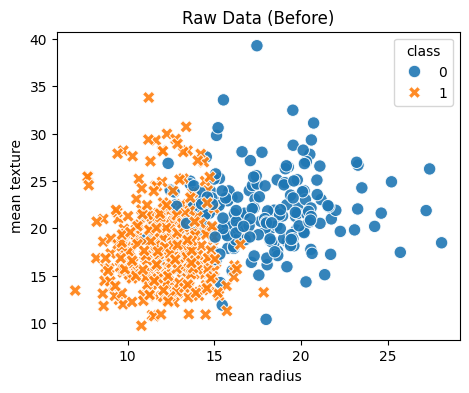

In [33]:
plt.figure(figsize=(5.2, 4))

sns.scatterplot(x='mean radius', y='mean texture', data=df, hue='class', style='class',
                alpha=0.9, edgecolor='w', s=80)

plt.title('Raw Data (Before)')
plt.show()

### X and y

In [34]:
X = df.drop('class', axis=1)
X.head()

,mean radius,mean texture
0,17.99,10.38
1,20.57,17.77
2,19.69,21.25
3,11.42,20.38
4,20.29,14.34


In [35]:
y = df['class']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: class, Length: 569, dtype: int32

### Feature Scaling
จะทำเฉพาะ X เท่านั้น

### 1. Normalization (MinMaxScaler)

In [ ]:
from sklearn.preprocessing import MinMaxScaler


sc=MinMaxScaler()
X_sc = sc.fit_transform(X)
X_sc[:5]

#ค่า min จะเป็น 0      max จะเป็น 1
#มักใช้กับข้อมูลที่มีค่าที่แน่นอน เช่น pixel ของภาพ

### 2. Standardization (StandardScaler)

In [43]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)
X_sc[:5]

#หลังจากใช้ StandardScaler แล้ว ค่าmean จะเป็น 0
#ใช้กับข้อมูลที่มีการแจกแจงแบบ Normal

array([[ 1.09706398, -2.07333501],
       [ 1.82982061, -0.35363241],
       [ 1.57988811,  0.45618695],
       [-0.76890929,  0.25373211],
       [ 1.75029663, -1.15181643]])

### 3. RobustScaler

In [49]:
# เหมือน StandardScaler แต่ข้อมูลจะอยู่ในช่วงที่น้อยกว่า
# สามารถใช้ในการลดผลกระทบของ outlier
from sklearn.preprocessing import RobustScaler

sc = RobustScaler()
X_sc = sc.fit_transform(X)
X_sc[:5]

array([[ 1.13235294, -1.5026643 ],
       [ 1.76470588, -0.19005329],
       [ 1.54901961,  0.42806394],
       [-0.47794118,  0.27353464],
       [ 1.69607843, -0.79928952]])

### Visualization

In [50]:
dfsc = pd.DataFrame(X_sc, columns=['mean radius', 'mean texture'])
# dfsc = pd.DataFrame(X_sc, columns=cancer.feature_names[0:4])

dfsc['class'] = y

dfsc.describe().round(3)

,mean radius,mean texture,class
count,569.000,569.000,569.000
mean,0.186,0.080,0.627
std,0.864,0.764,0.484
min,-1.566,-1.622,0.000
25%,-0.409,-0.474,0.000
50%,0.000,0.000,1.000
75%,0.591,0.526,1.000
max,3.613,3.631,1.000


### KDE Plot

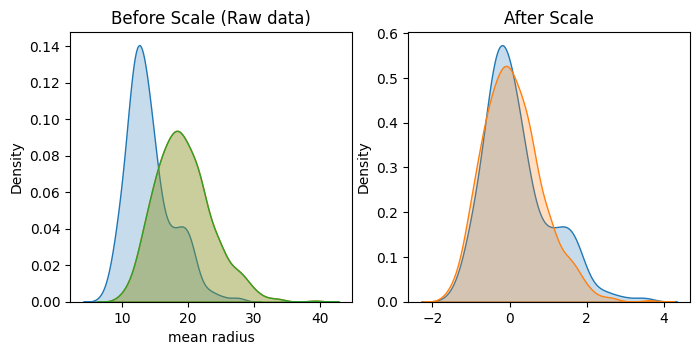

In [51]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 3.5))

ax1.set_title('Before Scale (Raw data)')
sns.kdeplot(df['mean radius'], fill=True, ax=ax1)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

ax2.set_title('After Scale')
sns.kdeplot(X_sc[:,0], fill=True, ax=ax2)
sns.kdeplot(X_sc[:,1], fill=True, ax=ax2)
sns.kdeplot(df['mean texture'], fill=True, ax=ax1)

plt.show()

### Scatter Plot

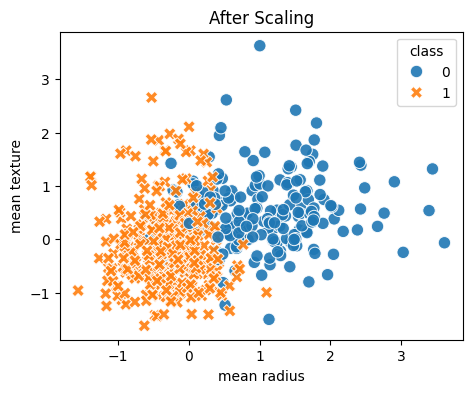

In [52]:
plt.figure(figsize=(5.2, 4))

sns.scatterplot(x='mean radius', y='mean texture', data=dfsc, hue='class', style='class',
                alpha=0.9, edgecolor='w', s=80)

plt.title('After Scaling')
plt.show()